### Model Based Machine Learning

    y = b + w1 x1 + w2 x3 + w3 x4 + ... + wn x4

### Instance Based Machine Learning

    we need training data to predict any data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
iris = sns.load_dataset('iris')

In [3]:
X = iris[['petal_length', 'petal_width']]
y = iris['species']

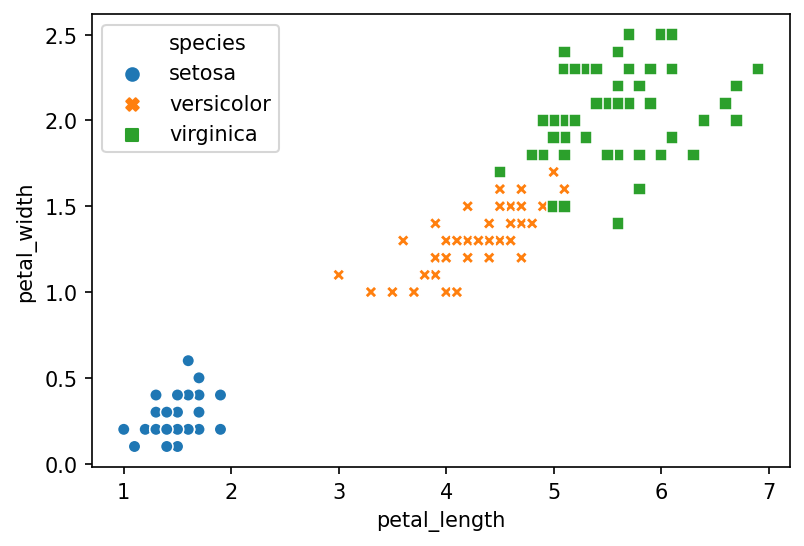

In [4]:
plt.figure(dpi=150)
sns.scatterplot('petal_length', 'petal_width', data=X, hue=y, style=y)
plt.show()

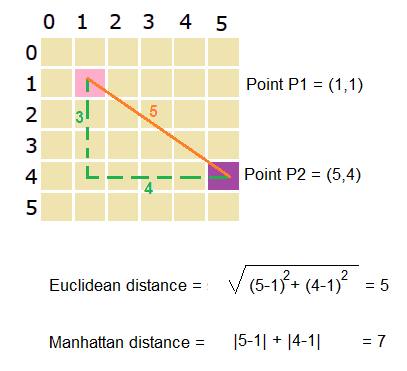

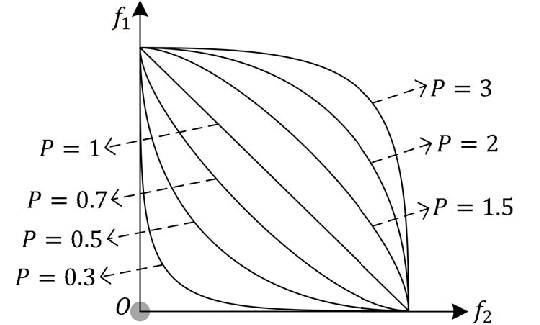

### Classification

In [5]:
p1 = np.array([10, 20, 30])
p2 = np.array([30, 40, 20])

sum(abs(p1 - p2)) # element

50

In [6]:
(sum((p2 - p1)**2))**(1/2)

30.0

$$\text {minkowski distance} = { (|{(x_2-x_1)}^n| + |{(y_2-y_1)}^n| )}^{\frac {1}{n} }$$

$$ p\sqrt { { \sum\limits_{i=1}^n| {(v_2 - v_1)}^p | }} $$ 

In [7]:
def distance(p1, p2, norm=2):
    """
    norm-1 => manhatten distance
    norm-2 => euclidean distance
    """
    d = sum(abs((p2-p1)**norm)) ** (1/norm)
    return d

    [0, 1, 0, 1, 0, 1] # sin 
    [0, 0, 1, 0, 1, 0] # cos 

In [8]:
p1 = np.array([10, 20, 30])
p2 = np.array([30, 40, 20])

In [9]:
distance(p1, p2, norm=1)

50.0

In [10]:
distance(p1, p2, norm=2)

30.0

In [11]:
p1 = iris.iloc[0].values[:-1]
p2 = iris.iloc[1].values[:-1]

distance(p1, p2) # setosa - setosa

0.5385164807134502

In [12]:
p1 = iris.iloc[0].values[:-1]
p2 = iris.iloc[60].values[:-1]

distance(p1, p2) # setosa - versicolor

2.703701166919155

In [13]:
p1 = iris.iloc[0].values[:-1]
p2 = iris.iloc[-1].values[:-1]

distance(p1, p2) # setosa - virginica

4.1400483088968905

In [14]:
lst = [
    ('ram', 60),
    ('shyam', 90),
    ('hari', 70),
    ('mohan', 67)
]

In [15]:
lst

[('ram', 60), ('shyam', 90), ('hari', 70), ('mohan', 67)]

In [16]:
lst.sort()
lst

[('hari', 70), ('mohan', 67), ('ram', 60), ('shyam', 90)]

In [17]:
lst.sort(key=lambda v: v[1])

In [18]:
lst

[('ram', 60), ('mohan', 67), ('hari', 70), ('shyam', 90)]

In [19]:
ds = [
    ('setosa', 6.5),
    ('versicolor', 9.3),
    ('virginica', 12.5)
]

In [20]:
ds.sort(key=lambda v: v[1], reverse=True)

In [21]:
ds

[('virginica', 12.5), ('versicolor', 9.3), ('setosa', 6.5)]

In [22]:
ds = [
    (3.2, 'setosa'),
    (1.2, 'versicolor'),
    (2.1, 'setosa'),
    (1.0, 'versicolor'),
    (3.6, 'setosa'),
    (7.0, 'virginica'),
    (6.0, 'virginica'),
    (.6, 'versicolor')
]

In [23]:
ds.sort()

In [24]:
ds[:5]

[(0.6, 'versicolor'),
 (1.0, 'versicolor'),
 (1.2, 'versicolor'),
 (2.1, 'setosa'),
 (3.2, 'setosa')]

In [25]:
X = iris[['petal_length', 'petal_width']]
y = iris['species']

In [26]:
def distance(p1, p2, norm=2):
    """
    norm-1 => manhatten distance
    norm-2 => euclidean distance
    """
    d = sum(abs((p2-p1)**norm)) ** (1/norm)
    return d

In [27]:
point = np.array([5.0, 1.6])

In [28]:
result = []
for pi, cls in zip(X.values, y):
    #print(distance(point, pi), pi, cls)
    ds = distance(point, pi)
    result.append((ds, cls))

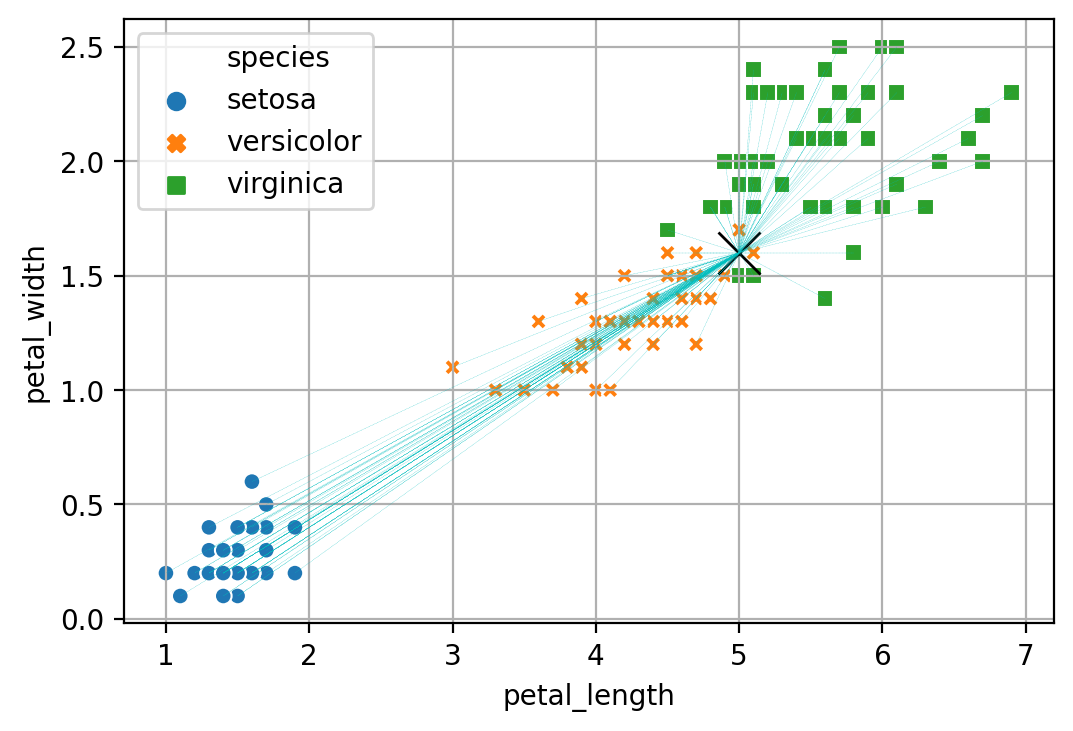

In [29]:
point = np.array([5.0, 1.6])
plt.figure(dpi=200)
sns.scatterplot('petal_length', 'petal_width', data=X, hue=y, style=y)
plt.plot(point[0:1], point[1:], 'x', markersize=15, color='k')
plt.grid()

result = []
for pi, cls in zip(X.values, y):
    #print(distance(point, pi), pi, cls)
    xs = [point[0], pi[0]]
    ys = [point[1], pi[1]]
    plt.plot(xs, ys, '--c', lw=0.1)
    ds = distance(point, pi)
    result.append((ds, cls))

plt.show()

In [30]:
def distance(p1, p2, norm=2):
    """
    norm-1 => manhatten distance
    norm-2 => euclidean distance
    """
    d = sum(abs((p2-p1)**norm)) ** (1/norm)
    return d
def k_nearest_neighbor(point, X, y,k=5, show_fig=False):
    plt.figure(dpi=100)
    sns.scatterplot('petal_length', 'petal_width', data=X, hue=y, style=y)
    plt.plot(point[0:1], point[1:], 'x', markersize=15, color='k')
    plt.grid()

    result = []
    for pi, cls in zip(X.values, y):
        #print(distance(point, pi), pi, cls)
        xs = [point[0], pi[0]]
        ys = [point[1], pi[1]]
        plt.plot(xs, ys, '--c', lw=0.1)
        ds = distance(point, pi)
        result.append((ds, cls))

    plt.show()
    result.sort()
    return result[:k]
    


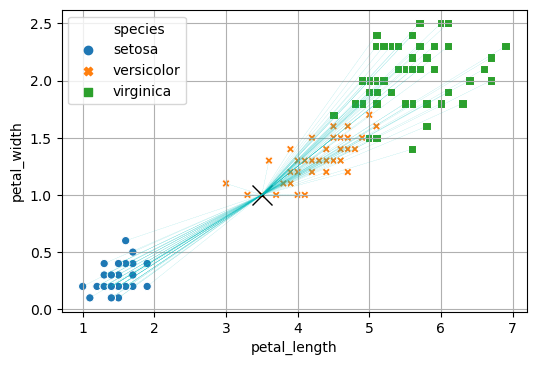

[(0.0, 'versicolor'),
 (0.0, 'versicolor'),
 (0.20000000000000018, 'versicolor'),
 (0.20000000000000018, 'versicolor'),
 (0.20000000000000018, 'versicolor')]

In [31]:
point = np.array([3.5, 1])

ds = k_nearest_neighbor(point, X, y, show_fig=True)
ds

In [32]:
a = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 4, 6, 7, 8, 3, 2, 3, 2]

d = { }

for item in a:
    if item in d:
        d[item] += 1
    else:
        d[item] = 1
print(d)
sorted(d.items(), key=lambda v:v[1], reverse=True)[0][0]

{1: 2, 2: 4, 3: 3, 4: 2, 5: 1, 6: 2, 7: 2, 8: 2, 9: 1}


2

    Create a KNN model to predict multi target classifciation

In [33]:
def decision_function(neighbours):
    classes = { }
    for ds, cls in neighbours:
        if cls in classes:
            classes[cls] += 1
        else:
            classes[cls] = 1
    result = sorted(classes.items(), key=lambda v:v[1], reverse=True)
    return result[0][0]
    
    

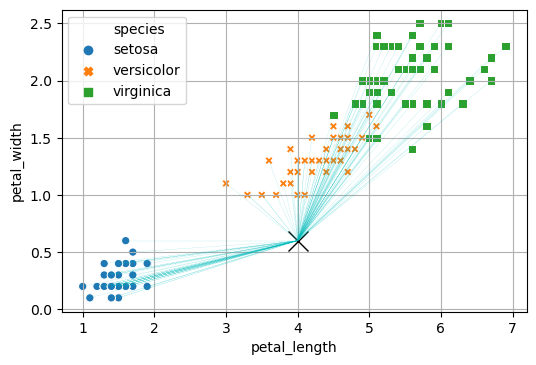

'versicolor'

In [35]:
point = np.array([4.0, .6])

ds = k_nearest_neighbor(point, X, y, show_fig=True)

decision_function(ds)

    fit

    predict



In [10]:
from sklearn.base import BaseEstimator
import numpy as np
import seaborn as sns
iris = sns.load_dataset('iris')

In [35]:
class KNearestNeighbor(BaseEstimator):
    def __init__(self, n_neighbors=5, norm=2):
        self.k = n_neighbors
        self.norm = norm
    def fit(self, X, y):
        self.X = np.array(X)
        self.y = y
    def predict(self, X_new):
        X_new = np.array(X_new)
        pred = []
        for point in X_new:
            result = []
            for pi, cls in zip(self.X, self.y):
                xs = [point[0], pi[0]]
                ys = [point[1], pi[1]]
                ds = self.distance(point, pi, norm=self.norm)
                result.append((ds, cls))
            result.sort()
            pred.append(self.decision_function(result[:self.k]))
        return np.array(pred)
        
    def decision_function(self, neighbors):
        classes = { }
        for ds, cls in neighbors:
            if cls in classes:
                classes[cls] += 1
            else:
                classes[cls] = 1
        result = sorted(classes.items(), key=lambda v:v[1], reverse=True)
        return result[0][0]
    def distance(self, p1, p2, norm=2):
        d = sum(abs((p2-p1)**norm)) ** (1/norm)
        return d

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [37]:
X = iris.drop('species', axis=1)
y = iris['species']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [48]:
knn_model = KNearestNeighbor()
knn_model.fit(X_train, y_train)
y_hat = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_hat))
print(accuracy_score(y_test, y_hat))

[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]
0.9666666666666667


In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_hat = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_hat))

[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]


In [50]:
print(accuracy_score(y_test, y_hat))

0.9666666666666667


In [55]:
setosa = knn_model.predict_proba(X_test)[:, 1]

In [56]:
setosa

array([0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 1. , 1. , 0.4, 1. , 0. ,
       0.2, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 1. , 0.4, 0. , 1. ,
       0. , 0.2, 0. , 0. ])

In [59]:
y1 = y == 'setosa'

In [64]:
y2 = np.c_[y=='versicolor', y1]

In [65]:
y2[:8]

array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True]])

In [67]:

knn_model = KNeighborsClassifier()
knn_model.fit(X, y2)
y_hat = knn_model.predict(X)


In [69]:
knn_model.predict(X)[:5]

array([[False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True]])

In [5]:
import seaborn as sns

In [6]:
mpg = sns.load_dataset('mpg').dropna()

In [7]:
X = mpg[['horsepower', 'weight', 'displacement']]
y = mpg['mpg']

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [9]:
knn = KNeighborsRegressor(n_neighbors=5)
sgd = LinearRegression()

In [10]:
knn.fit(X, y)
sgd.fit(X, y)

LinearRegression()

In [11]:
p1 = knn.predict(X)
p2 = sgd.predict(X)

In [12]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [13]:
print(r2_score(y, p1))

0.8067988890498534


In [14]:
print(r2_score(y, p2))

0.7069554693444708


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [19]:
from sklearn.metrics import mean_squared_error
import numpy as np
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

In [25]:
train_errors = []
test_errors = []
ks = []
for k in range(5, 105, 5):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    train_error = rmse(y_train, model.predict(X_train))
    test_error = rmse(y_test, model.predict(X_test))
    ks.append(k)
    train_errors.append(train_error)
    test_errors.append(test_error)

In [26]:
import matplotlib.pyplot as plt

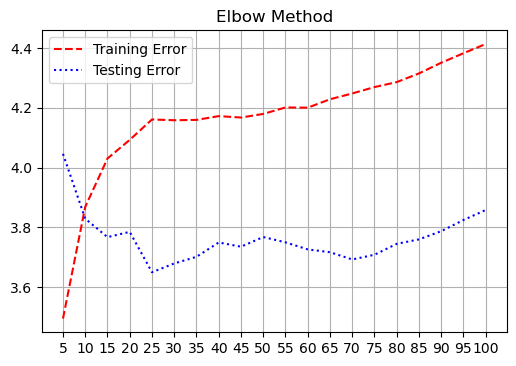

In [29]:
plt.figure(dpi=100)
plt.title('Elbow Method')
plt.plot(ks, train_errors, 'r--', label='Training Error')
plt.plot(ks, test_errors, 'b:', label='Testing Error')
plt.legend()
plt.xticks(ks)
plt.grid()
plt.show()